<a href="https://colab.research.google.com/github/zugbaa/RUSU_projekt_email_spam_filter/blob/main/Email_spam_filter_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/My Drive/spam.csv")

df = df[['Body', 'Label']]

print(df)

                                                   Body  Label
0     Subject: stock promo mover : cwtd\n * * * urge...      1
1     Subject: are you listed in major search engine...      1
2     Subject: important information thu , 30 jun 20...      1
3     Subject: = ? utf - 8 ? q ? bask your life with...      1
4     Subject: " bidstogo " is places to go , things...      1
...                                                 ...    ...
3995  Subject: revison # 1 - hpl noms . for november...      0
3996  Subject: hpl nom for december 27 , 2000\n ( se...      0
3997  Subject: akamai\n kevin ,\n i have followed up...      0
3998  Subject: re : summary spreadsheet for data ven...      0
3999  Subject: re : congratulations\n congratulation...      0

[4000 rows x 2 columns]


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(df['Body'], df['Label'], stratify=df['Label'])

In [ ]:
# Tokenize the email text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

# Convert the text data to sequences
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to have the same length
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)


In [ ]:
# Define the model architecture
model = Sequential()
model.add(Embedding(10000, 100, input_length=100))
model.add(LSTM(128))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,125,569
Trainable params: 1,125,569
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
94/94 [==============================] - 27s 250ms/step - loss: 0.3628 - accuracy: 0.8390
Epoch 2/5
94/94 [==============================] - 21s 229ms/step - loss: 0.0719 - accuracy: 0.9810
Epoch 3/5
94/94 [==============================] - 24s 253ms/step - loss: 0.0251 - accuracy: 0.9940
Epoch 4/5
94/94 [==============================] - 21s 225ms/step - loss: 0.0107 - accuracy: 0.9963
Epoch 5/5
94/94 [==============================] - 23s 246ms/step - loss: 0.0089 - accuracy: 0.9977


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

32/32 [==============================] - 2s 58ms/step - loss: 0.2197 - accuracy: 0.9570
Test Loss: 0.21968264877796173
Test Accuracy: 0.9570000171661377


In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()
print(y_predicted)

32/32 [==============================] - 3s 81ms/step
[9.99999166e-01 1.47066126e-02 1.01019767e-04 9.99996424e-01
 8.43475580e-01 9.99999881e-01 2.09339745e-02 9.99859929e-01
 6.38234269e-05 2.09206773e-05 4.66883757e-05 9.99986410e-01
 9.99940455e-01 9.99892235e-01 3.82780581e-06 3.05302024e-06
 9.99999702e-01 5.07463883e-05 2.59921580e-06 1.96394149e-06
 2.75656043e-06 7.23622888e-02 1.04471728e-05 9.99999821e-01
 3.10367341e-07 5.00977476e-05 1.00000000e+00 3.22839187e-05
 9.99997973e-01 4.94302913e-06 9.99998808e-01 8.02340874e-05
 9.99998927e-01 2.04965454e-05 1.20375745e-07 1.91865738e-07
 1.24460189e-02 8.72872988e-06 9.99999166e-01 9.99998748e-01
 5.02798102e-05 9.99419808e-01 3.56586315e-05 1.00000000e+00
 9.89603400e-01 7.07513630e-01 9.99994278e-01 9.99998629e-01
 9.99999821e-01 1.00000000e+00 4.23105035e-07 9.99687374e-01
 3.50085060e-07 6.35733704e-06 1.21927857e-04 5.34934103e-01
 1.24354563e-06 6.96902589e-07 4.19059470e-05 1.35788038e-01
 2.70931159e-05 5.02975035e-06 

In [ ]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
print(y_predicted)

[1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0
 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1
 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0
 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1
 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0
 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1
 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0
 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0
 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0
 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1
 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 0 0 0 1 1 0 1 0 0 0 1 1 

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
print(cm)

[[476  24]
 [ 19 481]]


Text(50.722222222222214, 0.5, 'truth')

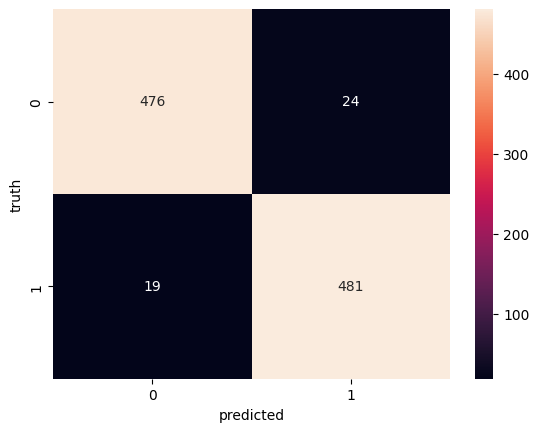

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn

sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       500
           1       0.95      0.96      0.96       500

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000

